# Introduction to Programming and Numerical Analysis - Spring 2022 - Project 1: Data analysis

## The relationship between per capita GDP and per capita emissions of the greenhouse gas carbon dioxide (CO2)

In this project we fetch yearly data from the World Bank, GDP (per capita) and CO2 emission (per capita) and use them to perform a descriptive analysis of link between economic growth and CO2 emission from 1998 to today. 

The objective of this study is to investigate, if there is a relationship
between economic growth and carbon dioxide (𝐶𝑂2) emissions. Will a richer economy
worsen the environmental quality even further due to increased emissions, or will an increase in per capita GDP not only increase the living standards but also contribute to a better, less polluted planet?

First, we read and clean the data. Next, we use the concatenate and join functions to compile the data in a single DataFrame. Then, we compute log returns and analyse these through descriptive statistics and (interactive) visualisations. Finally, we account for some real world events, which can be drivers of increased volatility in given periods.

**Imports and set magics:**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing and cleaning data from the World Bank

We begin with importing the data for CO2 emission for high income, middle income and low income countries.

In [99]:
# First we import CO2 emission data from World Bank:
wb_co2 = wb.download(indicator='EN.ATM.CO2E.KT', country=['HIC', 'LMC', 'LMY', 'UMC','MIC','LIC'], start=1998, end=2018)
wb_co2 = wb_co2.rename(columns = {'EN.ATM.CO2E.KT':'CO2 emissions'})
wb_co2 = wb_co2.reset_index()

# Then we import GDP data from the World Bank:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['HIC', 'LMC', 'LMY', 'UMC','MIC','LIC'], start=1998, end=2018)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp = wb_gdp.reset_index()

C:\Users\laura\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: HIC, LIC, LMC, LMY, MIC, UMC
  warnings.warn(


In [101]:
# As the variables are treated uncorrect, we are convert year and countries to the special panda string. 
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_co2.year = wb_co2.year.astype(int) # convert year
wb_co2.country = wb_co2.country.astype('string') # convert country to the special pandas string type

# We now see that country is now a string variable and year is now treated as an integer. 
wb_gdp.info()
wb_co2.info()

We now merge the two dataset together by year and income level. We do this by the method 'inner' join, which means that only the matched years and countries in each dataset is moved to the merged dataset.

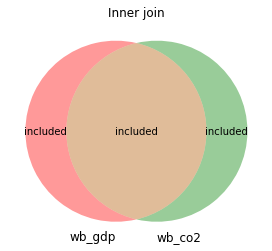

In [111]:
merged = pd.merge(wb_gdp,wb_co2, how='inner', on=['year','country'])
data = merged.sort_values(['country','year']) # sort by first municipality then year

# venn diagram

plt.figure()
v = venn2(subsets = (4, 4, 10), set_labels = ('wb_gdp', 'wb_co2'))
v.get_label_by_id('100').set_text('included')
v.get_label_by_id('010').set_text('included')
v.get_label_by_id('110').set_text('included')
plt.title('Inner join')
plt.show()

## Summary Statistics of the CO2 emission 

In [114]:
# DataFrames with descriptive stats by year and income level

#  extract year/month variable from datetime variable for statistics
stock_indices['year'], stock_indices['month'] = stock_indices['date'].dt.year, stock_indices['date'].dt.month

# setup empty DataFrame
desc_stat_y = pd.DataFrame()
desc_stat_m = pd.DataFrame()

# append columns to desc_stat
for i in indices:
    desc_stat_y[f'mean_{i}']= stock_indices.groupby('year')[f'log_returns_{i}'].mean()
    desc_stat_y[f'std_{i}'] = stock_indices.groupby('year')[f'log_returns_{i}'].std()
    desc_stat_y[f'min_{i}'] = stock_indices.groupby('year')[f'log_returns_{i}'].min()
    desc_stat_y[f'max_{i}'] = stock_indices.groupby('year')[f'log_returns_{i}'].max()

for i in indices:
    desc_stat_m[f'mean_{i}']= stock_indices.groupby('month')[f'log_returns_{i}'].mean()
    desc_stat_m[f'std_{i}'] = stock_indices.groupby('month')[f'log_returns_{i}'].std()
    desc_stat_m[f'min_{i}'] = stock_indices.groupby('month')[f'log_returns_{i}'].min()
    desc_stat_m[f'max_{i}'] = stock_indices.groupby('month')[f'log_returns_{i}'].max()
    
desc_stat_y

NameError: name 'stock_indices' is not defined

## Further investigation of the correlation between GDP and CO2 emission:

We now want to explore, if there is an different correlation between GDP and CO2 emission for high, middle and low income countries. By looking at the correlation of GDP and CO2 emission for income level in 2018, we see that there is difference. 

In [112]:
print(merged.corr())

                   year       GDP  CO2 emissions
year           1.000000  0.086723       0.303610
GDP            0.086723  1.000000       0.303371
CO2 emissions  0.303610  0.303371       1.000000


We now want to investiage the correlation further, which we do by looking at the decvelopment of the correlation. This is done by an interactive term, where each income level has an bubble which moves over time.

**Interactive plot** :

interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Analysis

We can now look at some specefic countries and see how the different indicators affect the CO2 emission. By looking at countries that are leading within the green transaction, it might show that the CO2 emission is controlled by other indicators than GDP. 

# Conclusion

ADD CONCISE CONLUSION.